In [12]:
import torch
import numpy as np
from sample_generation_net import Net
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [23]:
device = "cuda"
checkpoints = [
    "mapping_net_checkpoint_single_image/000000.pt",
    "mapping_net_checkpoint_single_image/007000.pt",
    "mapping_net_checkpoint_single_image/014000.pt"
]

net = Net()
net.load_state_dict(torch.load(checkpoints[2])['net'])
net.eval()
net = net.to(device)

In [24]:
n_samples = 5000

sample_z = torch.randn(n_samples, 1, 512).to(device)

# Compute and convert each latent vector in order not to go out of memory
sample_w = np.concatenate([net(z).detach().cpu().numpy() for z in sample_z])
# convert samples of Z to numpy
sample_z = sample_z.detach().cpu().numpy().reshape(n_samples, 512)


In [25]:
pca = PCA(n_components=2)
pc_z = pca.fit_transform(sample_z)
pc_w = pca.fit_transform(sample_w)

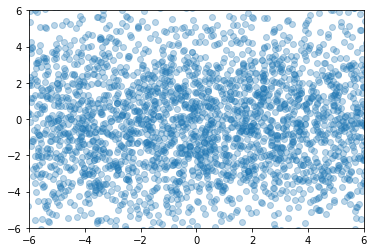

In [26]:

plt.scatter(pc_w[:, 0], pc_w[:, 1], alpha=0.3)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()